In [1]:
# import

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt

The data imported has dimensions 200.0 x 200.0 x 200.0 nm,
and resolution 1.0 x 1.0 x 1.0 nm.
There are a total of 200 slices in z.


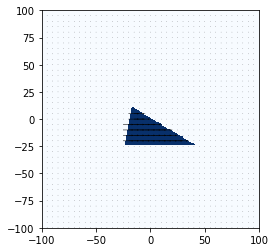

In [2]:
# Generate micromagnetic data

# Generate x,y,z value
n = 200 # number of nodes in each dimension (nxnxn grid)
ndet = n
size_n = 1 # length in nm of each node
xs = np.linspace(-n * (size_n/2),n * (size_n/2)-size_n,n)
ys = np.linspace(-n * (size_n/2),n * (size_n/2)-size_n,n)
zs = np.linspace(-n * (size_n/2),n * (size_n/2)-size_n,n)
xx, yy, zz = np.meshgrid(xs,ys, zs,indexing='ij')
nx = xx.reshape(n**3)
ny = yy.reshape(n**3)
nz = zz.reshape(n**3)
coor = np.array([nx,ny,nz]).T

# Define gradient/intercept of bounding lines
m1, c1 = 5, 100
m2, c2 = 0, -25
m3, c3 = -0.6, 0

data = []
for x in xs:
    for y in ys:
        for z in zs:
            if y < (m1*x+c1) and y > (m2*x + c2) and y < (m3*x + c3) and z >-10 and z<40:
                m = [1,0,0]
                data.append([x,y,z,m[0],m[1],m[2]])
            else:
                m = [0,0,0]
                data.append([x,y,z,m[0],m[1],m[2]])
                
Mxx = np.take(data,3,axis=1)
Myy = np.take(data,4,axis=1)
Mzz = np.take(data,5,axis=1)

Mxx = Mxx.reshape(len(xs),len(ys),len(zs))
Myy = Myy.reshape(len(xs),len(ys),len(zs))
Mzz = Mzz.reshape(len(xs),len(ys),len(zs))

# plot
# in this case plot the Mx values as slice z= 50 
%matplotlib inline
s=5
plt.quiver(xx[::s,::s,round(n/2)],yy[::s,::s,round(n/2)],Mxx[::s,::s,round(n/2)],Myy[::s,::s,round(n/2)],pivot='mid',scale=20)
plt.imshow(np.flipud(Mxx[:,:,round(n/2)].T), extent=[-n/2,n/2,-n/2,n/2],cmap='Blues',vmin=0,vmax=1)

m_x, m_y, m_z = Mxx, Myy, Mzz
MX, MY, MZ = Mxx, Myy, Mzz

ave_m_x = Mxx.mean(axis=2) # I'm not sure this is appropriate becasue it will include zeros
ave_m_y = Myy.mean(axis=2)
ave_m_z = Mzz.mean(axis=2)

# Array with unique z coordinates
xuni = np.unique(coor[:,0])
yuni = np.unique(coor[:,1])
zuni = np.unique(coor[:,2])

# Length of each dimension
x_len = len(xuni)
y_len = len(yuni)
z_len = len(zuni)

# Generate mesh
X, Y, Z = np.meshgrid(xuni, yuni, zuni, indexing='ij')

# Recover x/y values (for non-rotated data)
x_proj = np.average(X,axis=2)
y_proj = np.average(Y,axis=2)

# Calculate x/y values (for projected data)
det = (ndet,ndet)
x2 = np.linspace(xuni[0],xuni[-1],det[0])
y2 = np.linspace(yuni[0],yuni[-1],det[0])
x_proj2, y_proj2 = np.meshgrid(x2, y2, indexing='ij')

# Calculate grid spacing
x_res = (xuni[1]-xuni[0])
y_res = (yuni[1]-yuni[0])
z_res = (zuni[1]-zuni[0])

# Limits of grid
x_begin = xuni[0] - 0.5*x_res
x_end = xuni[-1] + 0.5*x_res
y_begin = yuni[0] - 0.5*y_res
y_end = yuni[-1] + 0.5*y_res
z_begin = zuni[0] - 0.5*z_res
z_end = zuni[-1] + 0.5*z_res

# Calculate size of grid
x_size = (x_end-x_begin)
y_size = (y_end-y_begin)
z_size = (z_end-z_begin)

# Confirm the dimensions of the image and resolution for the user.
sym_details = 'The data imported has dimensions ' + str(x_size) + ' x ' + str(y_size) + ' x ' + str(z_size) + ' nm,\n'
sym_details += 'and resolution ' + str(x_res) + ' x ' + str(y_res) + ' x ' + str(z_res) + ' nm.\n'
sym_details += 'There are a total of ' + str(z_len) + ' slices in z.'
print(sym_details)

In [167]:
# plot in 3D

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
s = 5
#a, b, c, d, e, f = X,Y,Z,MX,MY,MZ
a, b, c, d, e, f = Xr,Yr,Zr,MXr,MYr,MZr
ax.quiver(a[::s,::s,::s], b[::s,::s,::s], c[::s,::s,::s], d[::s,::s,::s], e[::s,::s,::s], f[::s,::s,::s],length = 5,alpha=0.5,linewidth=3,color='k')

ax.quiver(np.min(a),np.min(b),np.min(c),np.max(a)-np.min(a),0,0, color='red', length=1)
ax.quiver(np.min(a),np.min(b),np.min(c),0,np.max(b)-np.min(b),0, color='blue', length=1)
ax.quiver(np.min(a),np.min(b),np.min(c),0,0,np.max(c)-np.min(c), color='green', length=1)


plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

Text(0.5, 0, 'z')

In [9]:
# define rotation matrix function
import numpy as np
import math

def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])


In [10]:
# define function for converting A1,A2,A3 where each is (nxnxn) into B where it is (n**3 x 3)

def grids_to_vecs(A1,A2,A3):
    n = np.shape(A1)[0]
    A1 = A1.reshape(n**3)
    A2 = A2.reshape(n**3)
    A3 = A3.reshape(n**3)
    B = []
    for i in range(n**3):
        B.append([A1[i],A2[i],A3[i]])
    B = np.array(B)
    return B

In [11]:
def apply_rotation(B, mrot):
    B_rot = []
    
    for r in B:
        r_rot = np.dot(mrot,r)
        B_rot.append(r_rot)
        
    B_rot = np.asarray(B_rot)
    
    return B_rot

In [12]:
def vecs_to_grids(B):
    A1 = B.T[0]
    A2 = B.T[1]
    A3 = B.T[2]
    
    n = int(np.round(B.shape[0]**(1/3)))
    
    A1 = A1.reshape((n,n,n))
    A2 = A2.reshape(n,n,n)
    A3 = A3.reshape((n,n,n))
    
    return A1, A2, A3

In [13]:
# function to rotate grids of data
def rotate_gridded_data(A1,A2,A3, axis, theta):
    # create rotation matrix
    mrot = rotation_matrix(axis, theta)
    
    # convert grid matrices into array of vectors
    B = grids_to_vecs(A1,A2,A3)
    
    # apply rotation matrix to vectors
    B_rot = apply_rotation(B,mrot)
    
    # convert vectors back to grids
    A1_rot, A2_rot, A3_rot = vecs_to_grids(B_rot)
    
    return A1_rot, A2_rot, A3_rot

In [14]:
import timeit

axis = [0, 0, 1]
theta = np.pi/4

start = timeit.default_timer()
Xr,Yr,Zr = rotate_gridded_data(X,Y,Z,axis,theta)
stop = timeit.default_timer()

print('Time 1: ', stop - start)  

start = timeit.default_timer()
MXr, MYr, MZr = rotate_gridded_data(MX,MY,MZ,axis,theta)
stop = timeit.default_timer()

print('Time 2: ', stop - start) 

Time 1:  25.54368774300019
Time 2:  23.695660067000063


In [ ]:
import scipy.interpolate

coor = grids_to_vecs(X,Y,Z)
#output_x = scipy.interpolate.griddata(coor,MX.reshape(200**3),(Xr,Yr,Zr),method='linear',fill_value=0)

In [172]:
Xr.shape

(200, 200, 200)

In [152]:
avg_mxr = np.mean(MXr, axis=2)
plt.imshow(avg_mxr)

In [3]:
u = np.concatenate([thing.reshape(*thing.shape[:3],1) for thing in (X, Y, Z)], axis=3)

In [8]:
MX.shape

(200, 200, 200)